In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib notebook

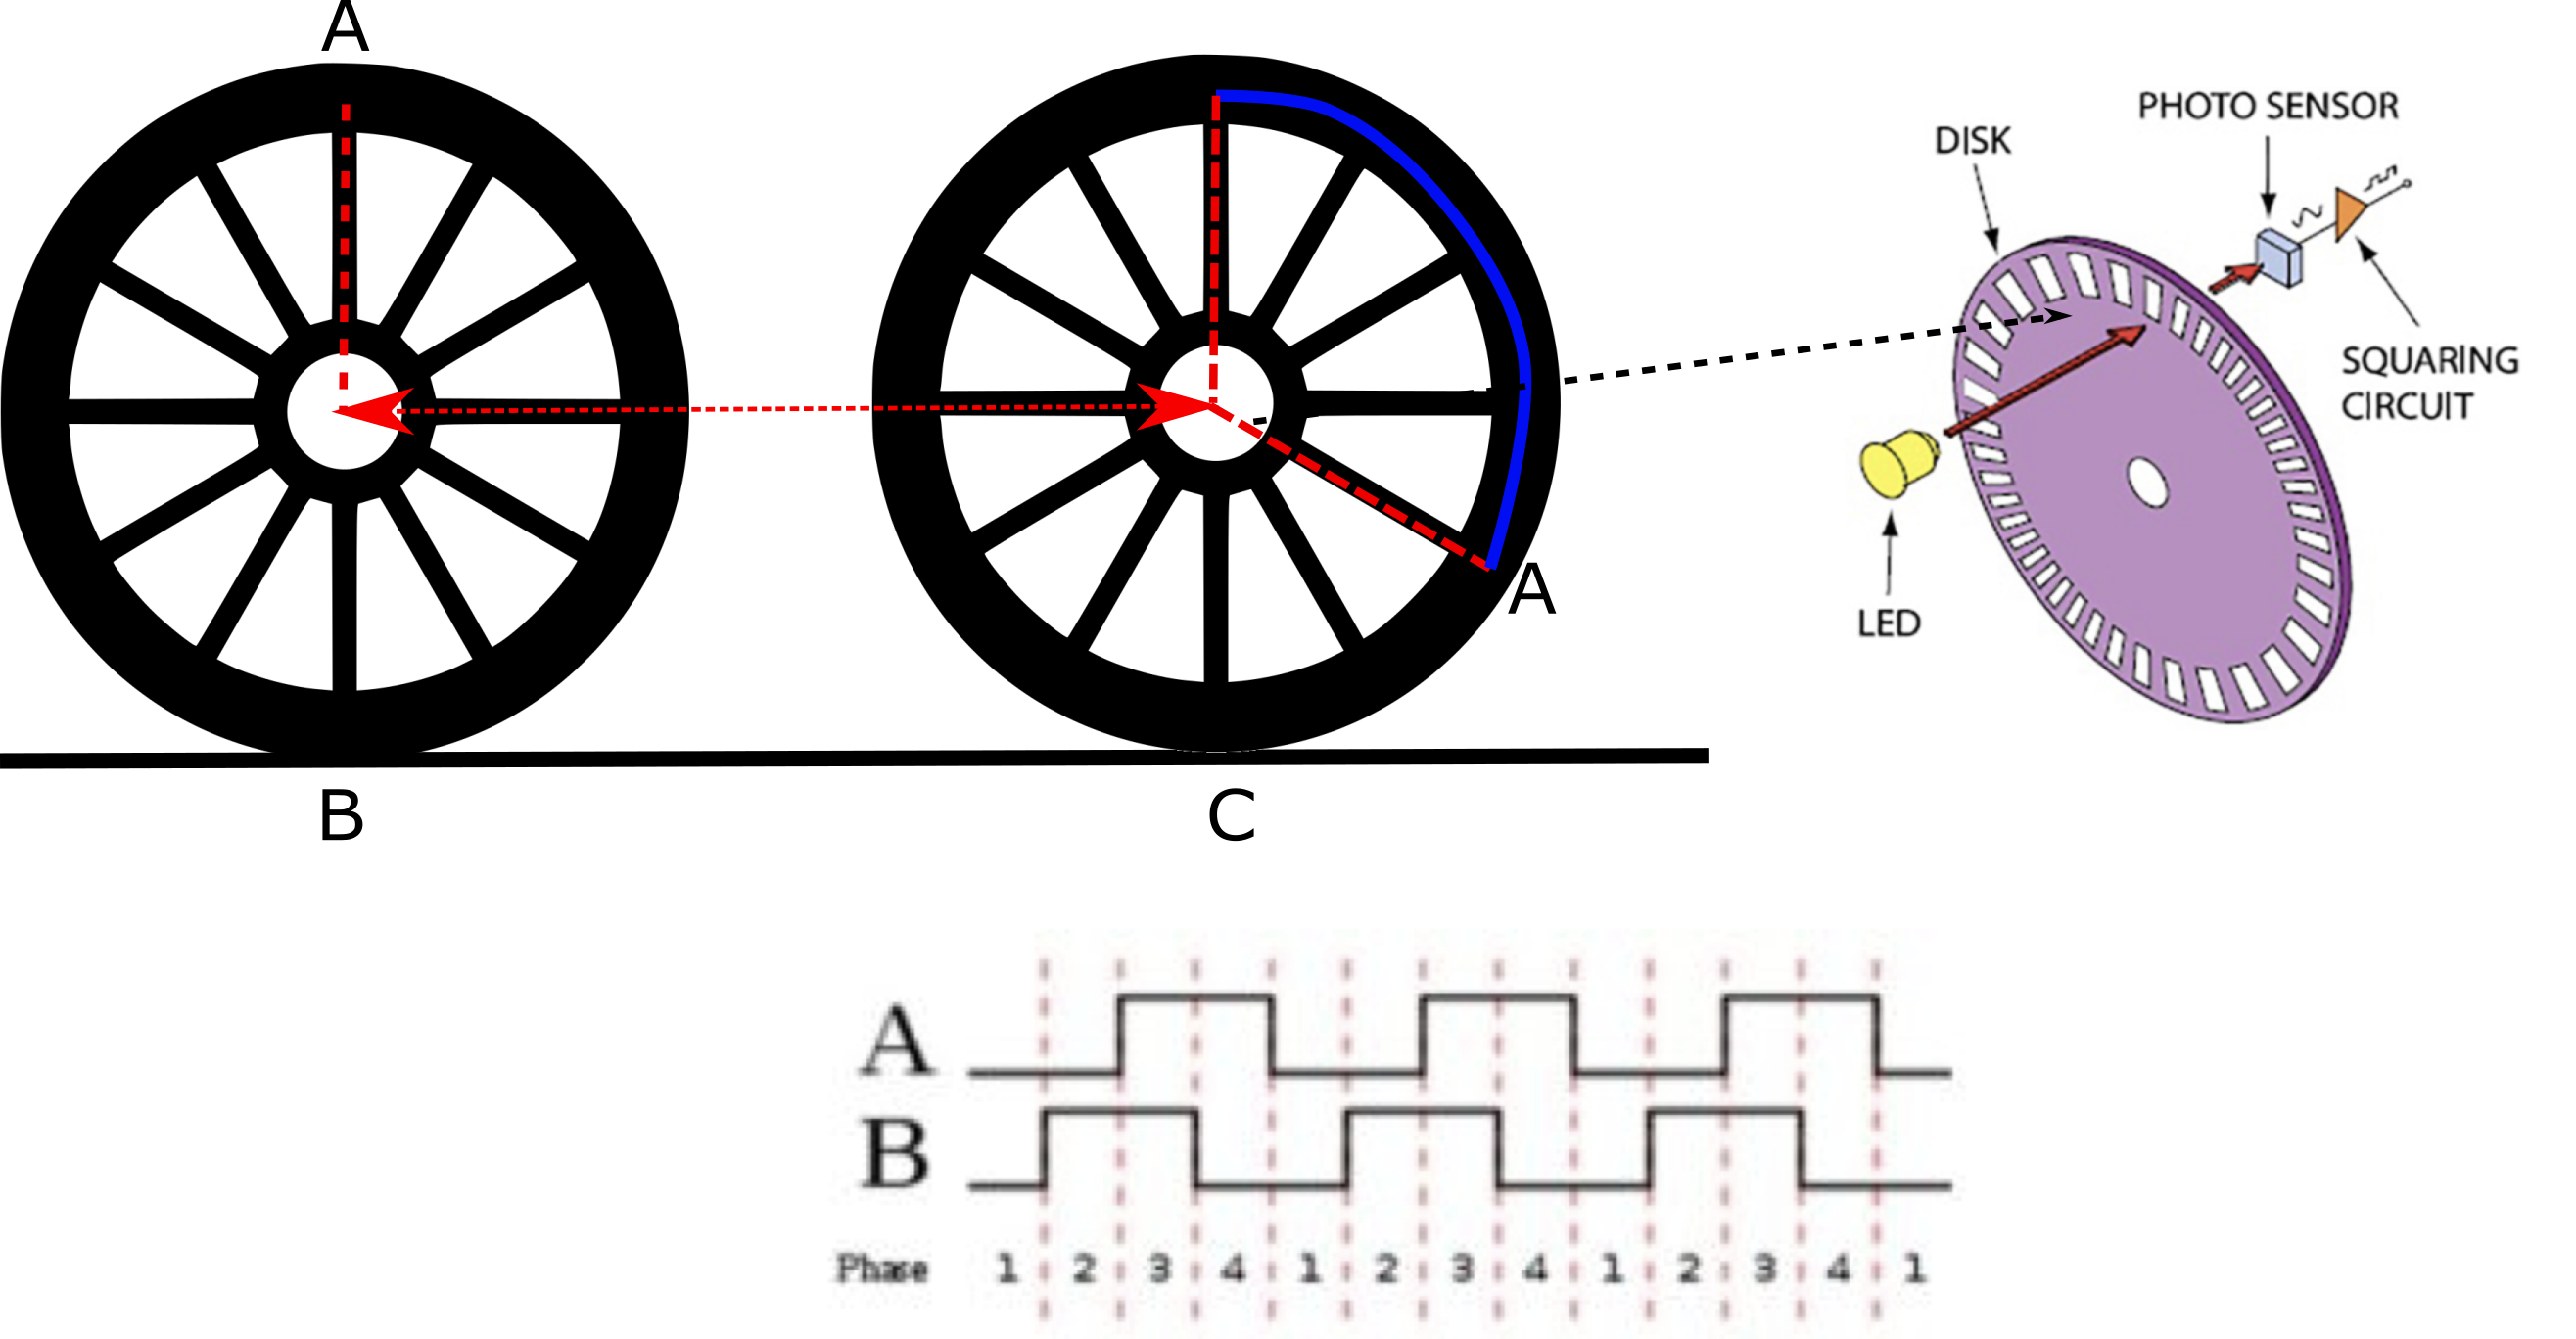

In [ ]:
Image('wheel_encoders.png')

In a differential-drive model, we discussed the relation between wheel velocities and robot's rotational and translational velocity, i.e, $v, \omega$. 

If we need to know curent $v, \omega$ how to measure wheel velocities? We use wheel encoders

Encoder resolution = $N$

Every $\Delta T$ ms,
+ Encoder reports # ticks wheel moved = $n$
+ Angle moved = $2\pi \frac{n}{N}$

Usage
+ Smallest movement that can be measured is $\frac{2\pi}{N}$
+ Largest speed that can be measured is $\frac{2\pi}{\Delta T}$

Pros:
+ Fairly accurate estimates of linear/ angular velocity
+ Distances and rotations are accurate in short-term

Cons:
+ Vehicle position “drifts” when $v,\omega$ is integrated over longer periods

Say, your robot's initial pose is (0.0, 0.0, 0.0), write a program to accept left and right ticks as input and output the next pose

Assume an unicycle model and following vehicle parameters
+ Wheel radius ($r$) =  2.0m
+ Track-width ($L$) = 4.0m
+ Encoder ticks ($N$) = 100 
+ Encoder frequency ($\Delta T$) = 0.1

Test your code with $n_{right} = 10$ and $N_{left} = 6$. Do you get the next pose as $(1.0053, 0.0, 0.1257)$?

### Effect of angular error in pose estimate

In [ ]:
initial_error = np.deg2rad(1.0)
robot_pose = np.array([0, 0, np.pi/2 + initial_error])

In [ ]:
# write your code to simulate straight line motion 
# robot can be assumed to be moving at constant speed of 2 m/s for 30 seconds
# feel free to borrow code from your previous notebooks

print(60 * np.tan(np.deg2rad(2)))

2.095246169504864


If there was no initial angle error, robot will end up at $x$ = 0.0. 

Plot a graph between initial_error and final $x$ position?

### Demonstrate localization drift in wheel encoders

### Synthetic dataset

In [ ]:
all_v = np.ones(100)
all_w = np.zeros(100) 

In [ ]:
wheel_enc_traj, wheel_enc_traj_noisy = [], []
ideal_pose = np.array([0, 0, np.pi/2])
noisy_pose = np.array([0, 0, np.pi/2])

for v, w in zip(all_v, all_w):
    robot_traj.append(ideal_pose)
    robot_traj_noisy.append(noisy_pose)
    #code to update ideal_pose
    #ideal_pose = 
    
    #code to update noisy pose
    #add gaussian noise with std dev of 0.01 to omega
    #noisy_pose = 
    
robot_traj = np.array(robot_traj)
robot_traj_noisy = np.array(robot_traj_noisy)

In [ ]:
plt.figure()
plt.grid()
# plt.axes().set_aspect("equal","datalim")
plt.plot(robot_traj[:,0], robot_traj[:,1],'k-')
plt.plot(robot_traj_noisy[:,0], robot_traj_noisy[:,1],'b-')
plt.plot(0, 0, 'r+', ms=10)
plt.legend()

### Real dataset

In [ ]:
!ls

ground_truth.csv  sample_data  wheel_control.csv


In [ ]:
data_dir = "."
ground_truth = pd.read_csv(data_dir + "/ground_truth.csv")
gt_traj = np.array(ground_truth[['x','y']])
wheel_enc = np.array(pd.read_csv(data_dir + "/wheel_control.csv")[['v','w']])

In [ ]:
def unicycle_model(pose, v, w, dt = 0.01):
  x, y, theta = pose
  x += v*np.cos(theta)*dt
  y += v*np.sin(theta)*dt
  theta += w*dt
  theta = np.arctan2(np.sin(theta), np.cos(theta))
  return x, y, theta

In [ ]:
pose = np.array(ground_truth[['x','y','theta']])[0] #initial pose
robot_traj = []
for v, w in wheel_enc:
    robot_traj.append(pose)
    # code for updating pose
    pose = unicycle_model(pose, v, w)
robot_traj = np.array(robot_traj)

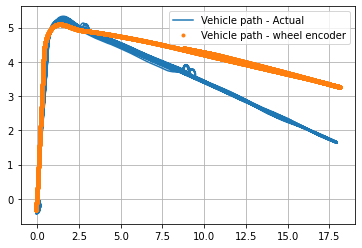

In [ ]:
end = 10000
plt.figure()
plt.grid()
plt.plot(gt_traj[:,0], gt_traj[:,1], label='Vehicle path - Actual')
plt.plot(robot_traj[:end,0], robot_traj[:end,1], '.', label='Vehicle path - wheel encoder')
plt.legend()